# Hypothesis Analysis

## Setup environment

### Import Packages

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pathlib
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from smart_simulation.cfg_templates.config import package_dir

### Connect to data

In [4]:
# Get path to raw weights data
raw_data_path = (
    pathlib.Path(package_dir) / "smart_simulation/outputs/simulations/weights"
)

# List all weights files
flist = [p for p in raw_data_path.iterdir() if p.is_file()]

## Sample EDA

### Raw Data Visualization

In [5]:
# Get sample
sample = pd.read_csv(flist[0], parse_dates=True, index_col=0)
sample.head()

,weight
2020-01-01 00:00:00,14.000000
2020-01-01 06:00:00,13.601856
2020-01-01 12:00:00,13.601856
2020-01-01 18:00:00,13.601856
2020-01-02 00:00:00,13.144815


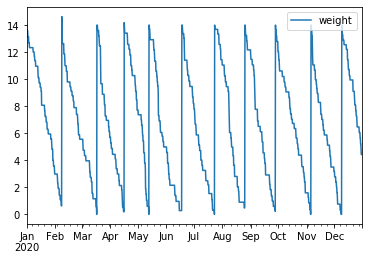

In [4]:
sample.plot()

### Consumption


In [5]:
raw_consumption = -1 * sample.weight.diff()

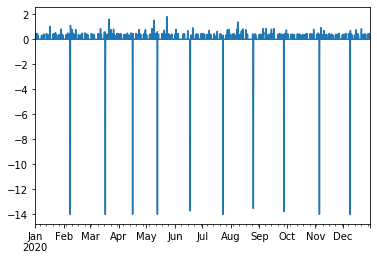

In [6]:
raw_consumption.plot()

#### Raw Frequency Analysis

In [7]:
def calculate_consumption(weight_data):
    raw_consumption = -1 * weight_data.diff()
    raw_consumption.loc[raw_consumption == -0] = 0
    with_new_product = raw_consumption.copy()
    with_new_product.loc[raw_consumption < 0] += 14
    return with_new_product

In [8]:
clean_consumption = calculate_consumption(sample.weight)

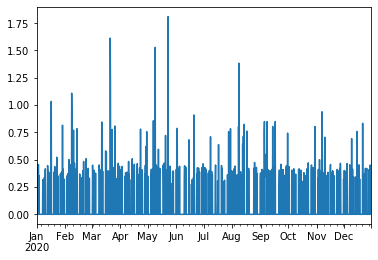

In [9]:
clean_consumption.plot()

#### Daily Frequency Analysis

In [10]:
daily_consumption = clean_consumption.groupby(pd.Grouper(freq="1D")).sum()

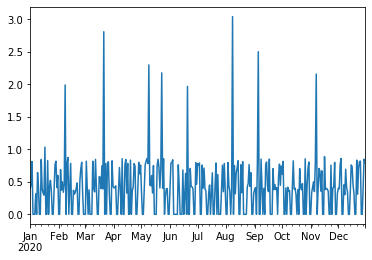

In [11]:
daily_consumption.plot()

#### Day of Week Analysis

In [12]:
day_of_week_mean = clean_consumption.groupby(clean_consumption.index.dayofweek).mean()
groups_by_day_of_week = clean_consumption.groupby(clean_consumption.index.dayofweek)

data_with_dow = daily_consumption.copy().to_frame("consumption")
data_with_dow["day_of_week"] = data_with_dow.index.day_name()

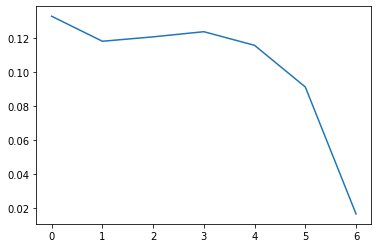

In [13]:
day_of_week_mean.plot()

0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: weight, dtype: object

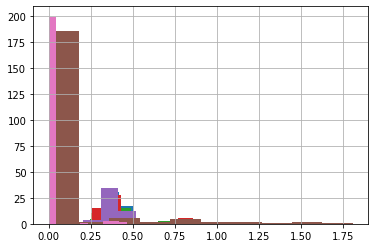

In [14]:
groups_by_day_of_week.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a247dff90>,
      dtype=object)

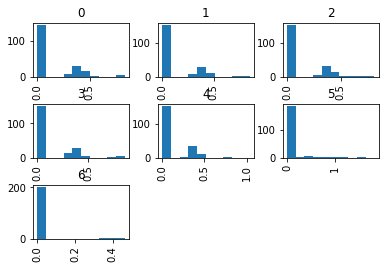

In [15]:
clean_consumption.hist(by=clean_consumption.index.dayofweek)

In [18]:
sns.__version__
# need version > 0.11.0 for displot

# sns.displot(data_with_dow, x="consumption", col="day_of_week",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )

'0.10.0'

[Text(0, 0.5, 'Consumption (ounces)'), Text(0.5, 0, 'Day of Week')]

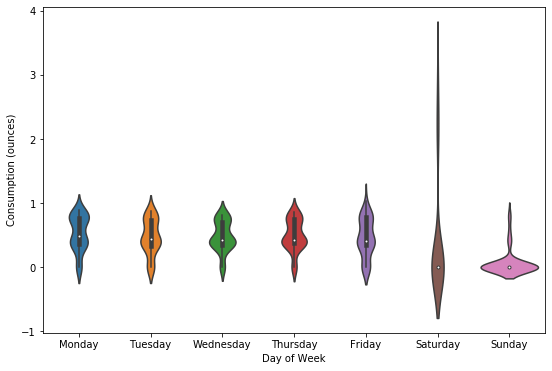

In [17]:
days_of_week = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.violinplot(
    x="day_of_week", y="consumption", data=data_with_dow, order=days_of_week
)
ax.set(xlabel="Day of Week", ylabel="Consumption (ounces)")

#### Raw and Daily
#### Time Series, Distribution, Time Correlations

## Full Training Dataset EDA